<a href="https://colab.research.google.com/github/Ankitkumar1015/gender-recognition-by-kaggle-data-set/blob/main/gender_from_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
train_data_dir = '/content/drive/MyDrive/Ml/gender kaggle - Copy/train'
test_data_dir = '/content/drive/MyDrive/Ml/gender kaggle - Copy/test'


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 1172 images belonging to 2 classes.
Found 119 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,  # Ensure this is correctly set
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 391s 9s/step - accuracy: 0.5058 - loss: 1.3387 - val_accuracy: 0.6354 - val_loss: 0.6556
Epoch 2/30
 1/36 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.6875 - loss: 0.6274

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step - accuracy: 0.6875 - loss: 0.6274 - val_accuracy: 0.5217 - val_loss: 0.7790
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.6801 - loss: 0.6061 - val_accuracy: 0.6771 - val_loss: 0.6128
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6250 - loss: 0.6995 - val_accuracy: 0.6957 - val_loss: 0.5005
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.7267 - loss: 0.5151 - val_accuracy: 0.6979 - val_loss: 0.6115
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.6562 - loss: 0.5176 - val_accuracy: 0.4783 - val_loss: 0.8979
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.7720 - loss: 0.5005 - val_accuracy: 0.6042 - val_loss: 0.7167
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9375 - loss: 0.2366 - val_accuracy: 0.6087 - val_loss: 0.7640
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.8183 - loss: 0.4034 - val_accuracy: 0.5625 - val_loss: 0.7

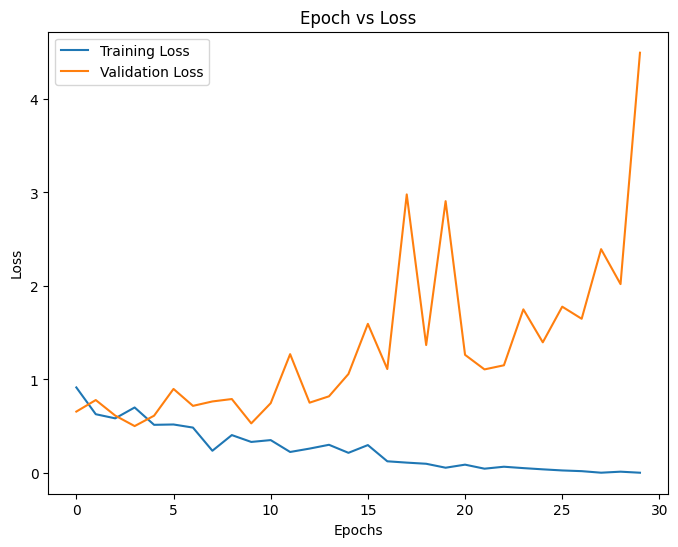

In [ ]:
# Plot Epoch vs Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')

# Check if 'val_loss' exists in history before plotting
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Epoch vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 867ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

In [ ]:
import seaborn as sns

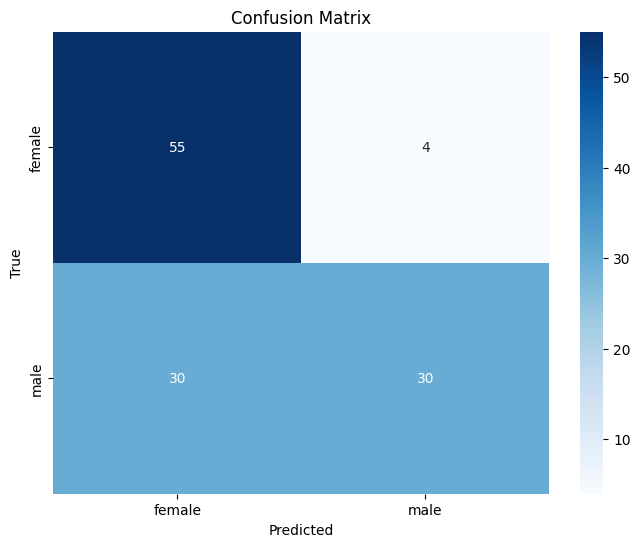

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


              precision    recall  f1-score   support

      female       0.65      0.93      0.76        59
        male       0.88      0.50      0.64        60

    accuracy                           0.71       119
   macro avg       0.76      0.72      0.70       119
weighted avg       0.77      0.71      0.70       119



In [ ]:
# Compute and print precision
precision = precision_score(true_classes, predicted_classes, average='binary')
print(f'Precision: {precision:.2f}')

Precision: 0.88


In [ ]:
# Compute and print recall
recall = recall_score(true_classes, predicted_classes, average='binary')
print(f'Recall: {recall:.2f}')

Recall: 0.50


In [ ]:
# Compute accuracy percentage
accuracy = np.mean(predicted_classes == true_classes) * 100
print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 71.43%


In [ ]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

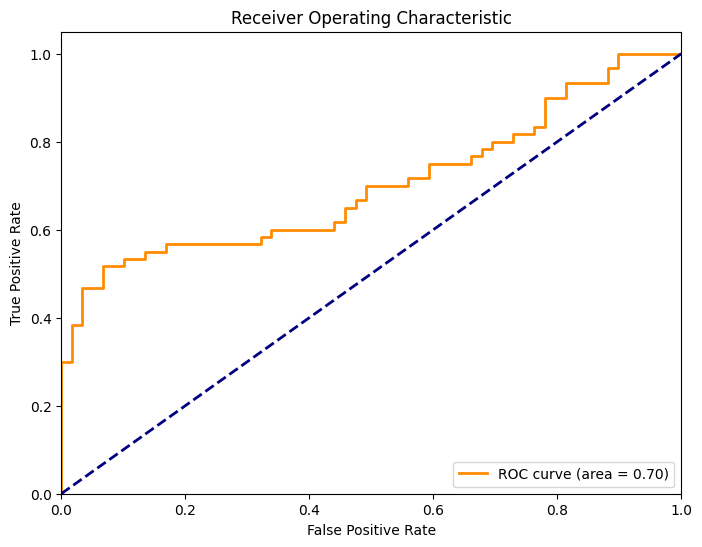

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()